# UNIT TESTING

In [1]:
import os
import sys

sys.path.append('./chemistrylab')
import gym
import chemistrylab
import numpy as np
from gym import envs

all_envs = envs.registry.all()
def ischemgym(x):
    if "Distill" in x:return True
    if "Extract" in x: return True
    if "React" in x: return True
    return False

env_ids = [env_spec.id for env_spec in all_envs if ischemgym(env_spec.id)]
print(env_ids)


['GenWurtzExtract-v1', 'WurtzExtract-v1', 'WurtzExtractCtd-v1', 'WaterOilExtract-v1', 'WurtzReact-v1', 'GenWurtzReact-v1', 'FictReact-v1', 'FictReact-v2', 'DecompReact-v0', 'WurtzReact-v2', 'ODETestReact-v0', 'WurtzDistill-v1']


In [2]:
import os
import shutil

#os.remove("UnitTest.py")
with open(".\\message.log","w") as f:
    pass

for id in env_ids:
    print("-"*60+"\n"+id,end=":")
    x = os.system("python UnitTest.py %s 200"%id)
    if x==1:
        with open("./message.log","r") as f:
            txt=""
            for line in f:
                txt=line
        print("Failed:\n"+line)
    elif x==0:
        print("Passed")
        

------------------------------------------------------------
GenWurtzExtract-v1:Failed:
cannot import name 'methyl_red' from 'chemistrylab.extract_algorithms.extractions' (C:\Users\sprag\Documents\Python Scripts\ResearchF2022\CHEMGYM\chemgymrl\chemistrylab\extract_algorithms\extractions\__init__.py)

------------------------------------------------------------
WurtzExtract-v1:Failed:
cannot import name 'methyl_red' from 'chemistrylab.extract_algorithms.extractions' (C:\Users\sprag\Documents\Python Scripts\ResearchF2022\CHEMGYM\chemgymrl\chemistrylab\extract_algorithms\extractions\__init__.py)

------------------------------------------------------------
WurtzExtractCtd-v1:Failed:
cannot import name 'methyl_red' from 'chemistrylab.extract_algorithms.extractions' (C:\Users\sprag\Documents\Python Scripts\ResearchF2022\CHEMGYM\chemgymrl\chemistrylab\extract_algorithms\extractions\__init__.py)

------------------------------------------------------------
WaterOilExtract-v1:Failed:
cannot im

# RL Rollout

```python
# the first action parameter is the requested change in temperature;
# action[0] = 0.0 indicates a temperature change of -dT
# action[0] = 1.0 indicates a temperature change of +dT
temp_change = 2.0 * (action[0] - 0.5) * self.dT

# the second action parameter is the requested change in volume;
# action[0] = 0.0 indicates a volume change of -dV
# action[0] = 1.0 indicates a volume change of +dV
volume_change = 2.0 * (action[1] - 0.5) * self.dV

# the remaining action parameters indicate the proportion of
# each reactant requested to be added to the reaction vessel;
# action[2] = 1.0 indicates that all available amounts of reactant[0] are to be added
# action[2] = 0.0 indicates that no amount of reactant[0] is to be added
reactant_proportions = action[2:]


# add the names of the reactants, products, and solutes available to all reactions
REACTANTS = [
    "1-chlorohexane",
    "2-chlorohexane",
    "3-chlorohexane",
    "Na"
]

```

In [30]:
os.system("python RLTrain.py steps=20000")

0

In [ ]:
import os
os.system("python RLTest.py PPO2_WurtzReact-v1 steps=500")


In [37]:

import pandas as pd

data = pd.read_pickle("PPO2_WurtzReact-v1/rollout")

data

,InState,Action,Reward,OutState,Done,Info,Step
0,"[0.0, 0.188, 0.49974987, 4.752e-05, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.8213808, 0.0, 0.33731765]",0.000000,"[0.05, 0.0, 0.49724862, 5.179392e-05, 0.0, 0.4...",False,{},0
1,"[0.05, 0.0, 0.49724862, 5.179392e-05, 0.0, 0.4...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.1016773]",0.000000,"[0.099, 0.0, 0.49974987, 5.393319e-05, 0.0, 0....",False,{},1
2,"[0.099, 0.0, 0.49974987, 5.393319e-05, 0.0, 0....","[0.5381391, 1.0, 0.0, 1.0, 0.0, 0.9947785]",0.000000,"[0.147, 0.015255642, 0.50225115, 6.036839e-05,...",False,{},2
3,"[0.147, 0.015255642, 0.50225115, 6.036839e-05,...","[0.0, 0.10570598, 0.7632059, 1.0, 0.0, 1.0]",0.000000,"[0.194, 0.0, 0.50027865, 6.7067405e-05, 0.3695...",False,{},3
4,"[0.194, 0.0, 0.50027865, 6.7067405e-05, 0.3695...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0]",0.000000,"[0.24, 0.0, 0.5027799, 6.646914e-05, 0.3581912...",False,{},4
...,...,...,...,...,...,...,...
495,"[1.26, 0.0, 0.522688, 6.2546715e-05, 0.2803725...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0]",0.000000,"[1.265, 0.0, 0.5251892, 6.222611e-05, 0.279106...",False,{},45
496,"[1.265, 0.0, 0.5251892, 6.222611e-05, 0.279106...","[0.0, 0.9160838, 0.5192088, 0.0, 0.0, 0.05083543]",0.000000,"[1.269, 0.0, 0.5272707, 6.1959116e-05, 0.27791...",False,{},46
497,"[1.269, 0.0, 0.5272707, 6.1959116e-05, 0.27791...","[0.0, 1.0, 0.52791846, 1.0, 0.0, 1.0]",0.000000,"[1.272, 0.0, 0.5297719, 6.164663e-05, 0.276791...",False,{},47
498,"[1.272, 0.0, 0.5297719, 6.164663e-05, 0.276791...","[0.0, 0.23490316, 0.0, 1.0, 0.0, 1.0]",0.000000,"[1.274, 0.0, 0.5284458, 6.178209e-05, 0.275734...",False,{},48


In [38]:
data.InState[0].shape

avgchoices=data.Action.mean()

dT = 2.0 * (avgchoices[0] - 0.5)

dV = 2.0 * (avgchoices[1] - 0.5)

REACTANTS = [
    "1-chlorohexane",
    "2-chlorohexane",
    "3-chlorohexane",
    "Na"
]


print("dT:",dT,"\ndV",dV)
for i in range(4):
    print(REACTANTS[i]+":",avgchoices[i+2])
    
print("Avg Reward:", data[data.Done==True].Reward.mean())

dT: -0.9906271323561668 
dV 0.30001330375671387
1-chlorohexane: 0.25023887
2-chlorohexane: 0.7546778
3-chlorohexane: 0.001495071
Na: 0.60111314
Avg Reward: 0.14560279304737997


# Example with Heuristic Policy:

In [ ]:
os.system("python RLTest.py WRH algorithm=WRH steps=500")

In [39]:

dataH = pd.read_pickle("WRH/rollout")
print("Avg Reward:", data[data.Done==True].Reward.mean())

Avg Reward: 0.14560279304737997


https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

# Radar Graph:

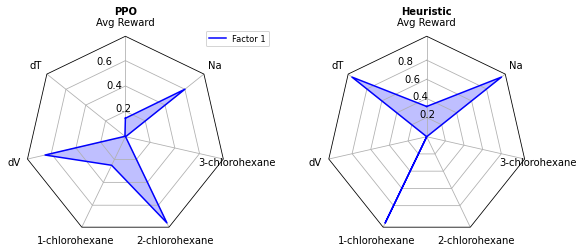

In [48]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
  
    info = [
        ['Avg Reward','dT', 'dV', '1-chlorohexane', '2-chlorohexane', '3-chlorohexane', 'Na' ],
        ('PPO', [
            [data[data.Done==True].Reward.mean()]+[a for a in data.Action.mean()]]),
        ('Heuristic', [
            [dataH[dataH.Done==True].Reward.mean()]+[a for a in dataH.Action.mean()]]),
        
    ]
    return info


if __name__ == '__main__':
    N = 7
    theta = radar_factory(N, frame='polygon')

    info = example_data()
    spoke_labels = info.pop(0)

    fig, axs = plt.subplots(figsize=(9, 9), nrows=1, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.5, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axs.flat, info):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = axs[0].legend(labels, loc=(0.9, .95),
                              labelspacing=0.1, fontsize='small')

    plt.show()

# First look:

Task:
- We want a vessel containing some material/chemical with high purity/yields?

Modules:
- Reaction
    - Do a chemical reaction to get a material/chemical
    * [More Info](#Reaction-bench-deeper-dive)
- Extraction
    - Use solutes to purify your material/chemical
- Distillation
    - Use boiling to purify your material/chemical further
- Characterization
    - Run tests to see what is actually in your output vessel
    
    
    
Each module has an agent associated with doing the module task, given instructions

There is a Lab manager agent with the task of giving instructions for each module

# Vessel

- Has a dictionary of materials
- Has a dictionady of solutes
- Has event queue

In [4]:
class dum:
    def __init__(self,string):
        self.s=string
    def __str__(self):return self.s
    def __repr__(self):return self.s
    
material_dict = {'H2O': [dum("H2O"), 100, 'mol'], 'C6H14': [dum("C6H14"), 100], 'Na': [dum("Na"), 1.0], 'Cl': [dum("Cl"), 1.0]}

# Easy to read display

I think there is some value in making things easy to read instead of having to look at constructors like in the first example
I implemented a quick way to show off materials/solutes

In [5]:
import pandas as pd
import numpy as np
from IPython import display
Display = display.display

def display_materials(material_dict,include_zeros=False):
    table = pd.DataFrame.from_dict(material_dict, orient="index",columns = ["Material","Amount","Unit"])
    print("Material Dict:")
    if include_zeros:
        display.display(table)
    else:
        display.display(table[table.Amount>0])
    
display_materials(material_dict)

Material Dict:


,Material,Amount,Unit
H2O,H2O,100.0,mol
C6H14,C6H14,100.0,None
Na,Na,1.0,None
Cl,Cl,1.0,None


In [6]:
solute_dict = {'Na': {'H2O': [dum("H2O"), 0.5, 'mol'], 'C6H14': [dum("C6H14"), 0.5, 'mol']},
               'Cl': {'H2O': [dum("H2O"), 0.5, 'mol'], 'C6H14': [dum("C6H14"), 0.5, 'mol']}}



def display_solutes(solute_dict):

    table = pd.DataFrame.from_dict(solute_dict, orient="index")

    renamedic = {str(h) : "[Solvent # Unit]" for h in table.columns}

    table.insert(loc=0, column='Solute', value=table.index)

    table.index=np.arange(len(table.index))

    table.rename(columns=renamedic, inplace = True)
    print("Solute Dict:")
    display.display(table)
    
display_solutes(solute_dict)

Solute Dict:


,Solute,[Solvent # Unit],[Solvent # Unit]
0,Na,"[H2O, 0.5, mol]","[C6H14, 0.5, mol]"
1,Cl,"[H2O, 0.5, mol]","[C6H14, 0.5, mol]"


# Event Queue

- Used to modify the contents of a vessel
- Modifications are passed in as "events"
- Why do we have events=None here:

```python
vessel_1 = vessel.Vessel(label='vessel_1')
vessel_2 = vessel.Vessel(label='vessel_2')

event_1 = ['update material dict', material_dict]
event_2 = ['update solute dict', solute_dict]
event_3 = ['drain by pixel', vessel_2, 100]

# Here we are adding the materials and solutions specified above into our first vessel, and then we pour 100ml
# of this solution from vessel 1 into vessel 2
vessel_1.push_event_to_queue(events=None, feedback=[event_1, event_2, event_3], dt=1)
```

- How do we get layering in the vessel?



# Reaction Bench:

- Recieves input vessel
- Selects reaction from a list of supported reactions
- Controls reaction parameters
- Loop previous two steps until agent says to stop
- returns an output vessel as a file
- How is the desired material/output specified?
    - Read from reaction file along with simulation details (why are these grouped together?)
    - Is there a way to do this without a bunch of file I/O?

# Extraction Bench

- Takes in one input vessel
- Returns a set of output vessels
- Target is represented by a string?
- Need to read the code to see how extraction is actually done
- Can transfer contents into other vessels
- Learn what this means:
    - utilizing specifically selected solutes to demarcate and separate materials
- Multiple vessels are saved as output

# Distillation Bench
- Looks like there is again just one input vessel (verify this)
- string target name
- dQ for maximum heat added?
- Looks like actions are to maintain or add heat, and switch the vessel that contents are boiled into
- Multiple vessels are saved as output

# Characterization Bench

- No modifications to input vessel
- Observations for the lab manager
- Main charactarization technique is spectrometric analysis
    - analyze() is called with vessel, analysis (technique) and something called overlap which isn't touched on yet 
- Outputs are an array which can easily be turned into an observation
- Is the vessel frozen in time during this process?
- Every bench has access to characterization now?

# Lab manager

- Has access to a shelf of vessels not in use
- Uses characterization to determine what is in the vessels
- Is in charge of allocating vessels to benches
- Inputs are the benches (excluding characterization)
- Does the lab manager get any say in the rewards of the individual benches?
- How are desired outcomes input for the manager?


# Questions:

- What is the point of making subclasses for your benches? -> for gym.make use?
- Why isn't reaction benches target also a string (currently looks to be in the input file)

# Reaction bench deeper dive


[Class Diagram](https://cruise.umple.org/umpleonline/umple.php?model=221127h5p7jm7vnbgu)

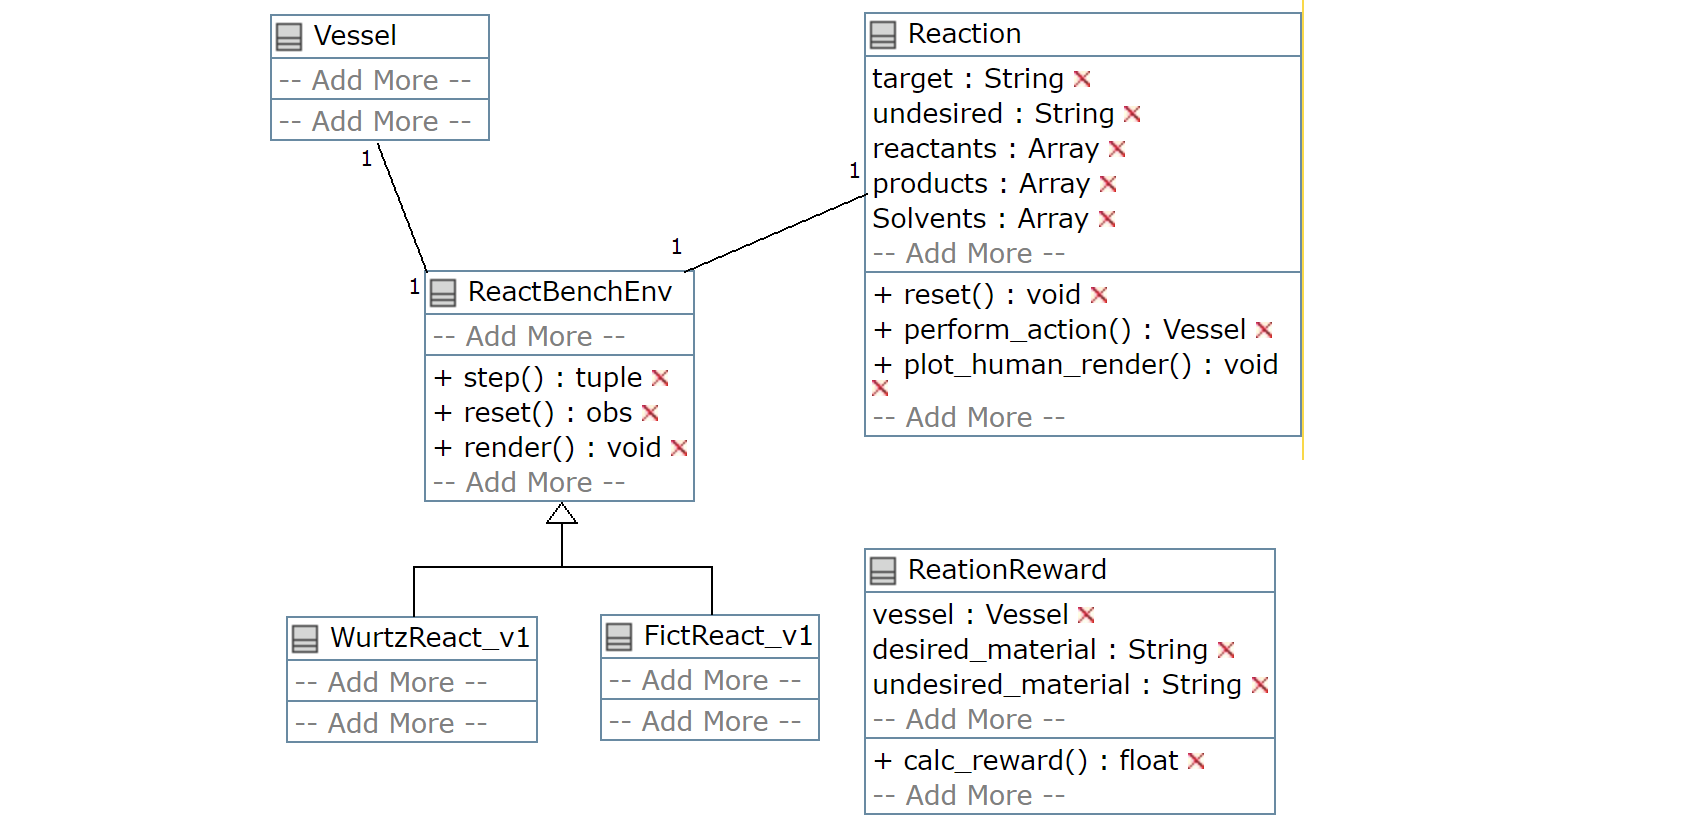

[Next](#Reaction-Bench-Issues)

# Reaction Bench Issues

- Need to tighten gym requirement
    - I had to upgrade my gym install
```
    Installing collected packages: gym-notices, gym
      Attempting uninstall: gym
        Found existing installation: gym 0.21.0
        Uninstalling gym-0.21.0:
          Successfully uninstalled gym-0.21.0
    Successfully installed gym-0.26.2 gym-notices-0.0.8
```

- Check if 0.18,0.15.7 works, once one works I can update requirements -> can create a branch and commit things

- reaction_lesson.ipynb is an empty file (link in reaction bench lesson)
- ```all_envs = envs.registry.all()``` in tutorial doesn't work

```python
# Fixed with this
reg = envs.registry
env_ids = [k for k in reg.keys() if "React" in k]
```
- When using WurtzReact-v1 it asks me to use v2 but trying to open v2 causes a crash

- ```env.render(mode=render_mode)``` doesn't work 
    - looks like mode has changed to model
- ```env.render()``` only plots graphs on the first call?
    - Fix: ```env._first_render = True```
    - Alt fix: ```%matplotlib notebook```
    - proposed change: let me pass an argument (called redraw maybe?) which forces the render function to make a new plot
    
- FictReact-v1 gives different rewards with the same policy
- ```env.step(action)``` doesn't work when using a gym.make() constructed environment [code](#Is-env.step()-broken?)

[Back](#Reaction-bench-deeper-dive) [Next](#Wurtz-Setup) 

In [7]:
import chemistrylab,time
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
import gym
import numpy as np
from gym import envs

# Fixed with this
all_envs = envs.registry.all()
reg = envs.registry
env_ids = [env_spec.id for env_spec in all_envs if 'React' in env_spec.id]


print(env_ids)
env = gym.make('WurtzReact-v1')
render_mode = "human"
action_set = ['Temperature', 'Volume', "1-chlorohexane", "2-chlorohexane", "3-chlorohexane", "Na"]

assert len(action_set) == env.action_space.shape[0]

['WurtzReact-v1', 'GenWurtzReact-v1', 'FictReact-v1', 'FictReact-v2', 'DecompReact-v0', 'WurtzReact-v2', 'ODETestReact-v0']
['chloro_wurtz.py', 'chloro_wurtz_v1.py', 'decomp.py', 'equilibrium.py', 'fict_react.py', 'fict_react2.py', 'methyl_red.py', 'ode_check.py', 'template.py', 'water_oil_v1.py', '__init__.py']


Material Dict:


,Material,Amount,Unit
DiEthylEther,diethyl ether,4,mol


Solute Dict:


,Solute


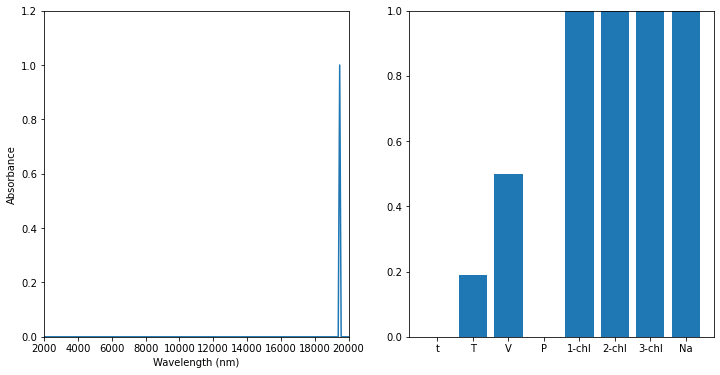

In [11]:
env.reset()
display_materials(env.vessels._material_dict)
display_solutes(env.vessels._solute_dict)
env.render()

# Is env.step() broken?

In [12]:
try:
    env.step([0]*6)
except Exception as e:
    print(e)

In [13]:
print(reg.env_specs["WurtzReact-v1"].entry_point)

chemistrylab.reaction_bench.reaction_bench_v1:WurtzReact_v1


# Wurtz Setup

2 1-chlorohexane + 2 Na -> dodecane + 2 NaCl

In [14]:
env2=chemistrylab.reaction_bench.reaction_bench_v1.WurtzReact_v1()
obs = env2.reset()
from matplotlib import pyplot as plt
#plt.plot(obs)
#plt.show()
print(env2.action_space)
obs = env2.reset()

print("Target:",env2.reaction.target)
print("Undesired:",env2.reaction.undesired)
Display(env2.vessels.get_material_table())

['chloro_wurtz.py', 'chloro_wurtz_v1.py', 'decomp.py', 'equilibrium.py', 'fict_react.py', 'fict_react2.py', 'methyl_red.py', 'ode_check.py', 'template.py', 'water_oil_v1.py', '__init__.py']
Box(0.0, 1.0, (6,), float32)
Target: dodecane
Undesired: 


,Material,Amount,Unit
DiEthylEther,diethyl ether,4,mol


[Back](#Reaction-Bench-Issues) [Next](#Wurtz-Run)

In [11]:
from IPython.display import clear_output
def run_wurtz():
    rew=0
    G=0
    #['Temperature', 'Volume', "1-chlorohexane", "2-chlorohexane", "3-chlorohexane", "Na"]
    obs = env2.reset()
    for x in range(100):
        clear_output(wait=True)
        env2.render()
        print(rew,G)
        if x<4:
            # pour 30% of vial repeatedly
            obs,rew,done,_ = env2.step([0.5,0.5,0.3,0.0,0.0,0.3])
        elif x==4:
            #pour remaining contents
            env2.step([0.5,0.5,1.0,0.0,0.0,1.0])
        else:
            obs,rew,done,_ = env2.step([0.5,0.5,0,0,0,0])
        G+=rew
        if done:
            break

    print(done,G)

# Wurtz Run

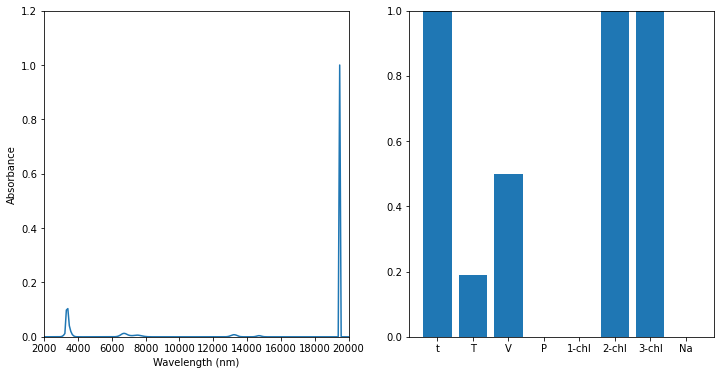

0 0
True 0.3092533779990231


In [12]:
run_wurtz()

[Back](#Wurtz-Setup) [Next](#Wurtz-Output)
# Wurtz Output

Recall, the target was for Wurtz is to create dodecane

In [13]:
Display(env2.vessels.get_material_table())

,Material,Amount,Unit
1-chlorohexane,1-chlorohexane,0.381493,mol
Na,Na,0.381493,mol
dodecane,dodecane,0.309253,mol
NaCl,NaCl,0.618507,mol
DiEthylEther,diethyl ether,4.000000,mol


[Back](#Wurtz-Run) [Next](#Ficticious-Reaction-Setup)

# Ficticious Reaction Setup

In [15]:
reg.env_specs["FictReact-v1"].entry_point

'chemistrylab.reaction_bench.reaction_bench_v1:FictReact_v1'

In [16]:
env3 = chemistrylab.reaction_bench.reaction_bench_v1.FictReact_v1()
env3.action_space
print("Target:",env3.reaction.target)
print("Undesired:",env3.reaction.undesired)
display_materials(env3.vessels._material_dict)

['chloro_wurtz.py', 'chloro_wurtz_v1.py', 'decomp.py', 'equilibrium.py', 'fict_react.py', 'fict_react2.py', 'methyl_red.py', 'ode_check.py', 'template.py', 'water_oil_v1.py', '__init__.py']
Target: 
Undesired: E
Material Dict:


,Material,Amount,Unit
H2O,H2O,30,mol


[Back](#Wurtz-Output) [Next](#Reward-Weirdness)


In [16]:
def run_fict(n=3,viz="table"):
    G=np.zeros(n)
    for y in range(n):
        rew=x=done=0
        obs = env3.reset()
        while not done:
            #Policy: At the start, pump in some A,B and mystery substance
            time.sleep(0.1)
            if viz=="table":
                clear_output(wait=True)
                Display(env3.vessels.get_material_table())
            elif viz=="graph":
                clear_output(wait=True)
                env3.render()
            
            if x==0:obs,rew,done,_ = env3.step([0.5,0.5,0.99,0.99,0.0,0.3]+[0.0]*3)
            else:obs,rew,done,_ = env3.step([0.55,0.45]+[0]*7)
            print(y,rew)
            G[y]+=rew
            x+=1
        #Print total return
        print(G)
    return G

# Reward Weirdness
I can get a reward but inconsistently?
- This is because it randomoly decides on a target when none is given

In [17]:
G = run_fict(n=3,viz="table")

,Material,Amount,Unit
A,A,0.540016,mol
B,B,0.540016,mol
D,D,0.000032,mol
F,F,0.449984,mol
G,G,0.449984,mol
H2O,H2O,30.000000,mol


2 0.0
[0.44999726 0.         0.        ]


[Back](#Ficticious-Reaction-Setup)

# Extraction Bench Deeper Dive

[uml](https://cruise.umple.org/umpleonline/umple.php?model=22120513bjggtmij6fb)

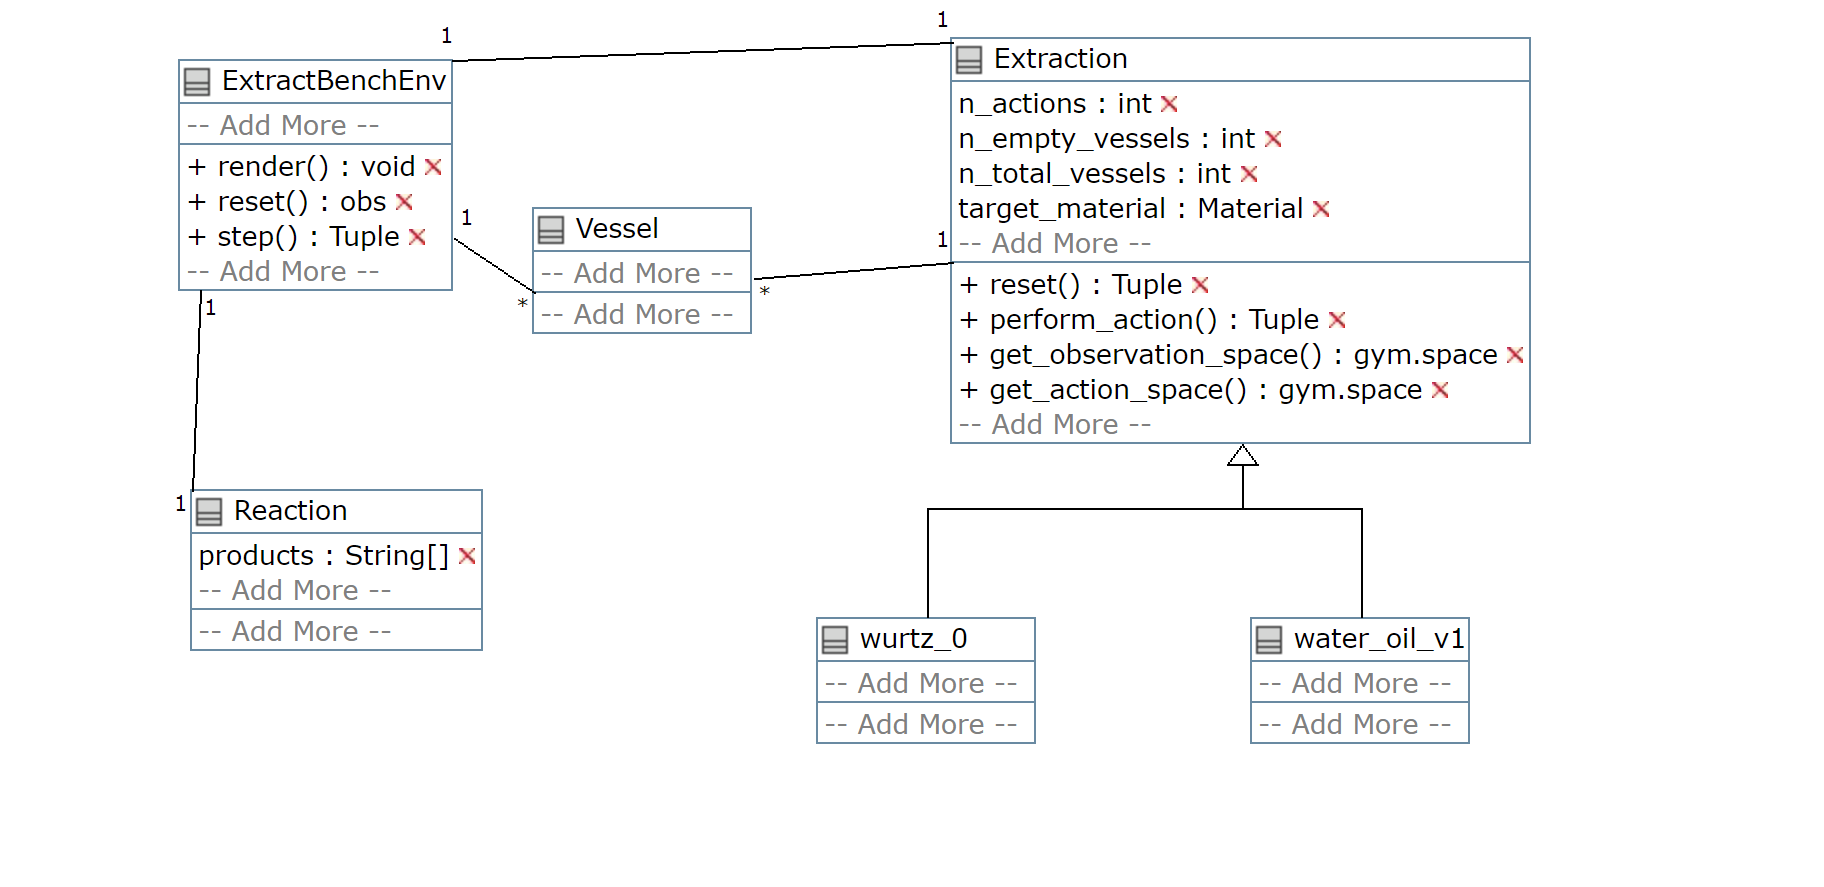

# Extraction Bench Issues

- Oil_Water_Extract-v1 does not work due to file IO issues
- Same with WurtzExtract_Ctd-v1

```python
File ~\Documents\Python Scripts\ResearchF2022\CHEMGYM\chemistrylab\chem_algorithms\util.py:52, in convert_material_dict_and_solute_dict_to_volume(material_dict, solute_dict, unit)
     49 total_volume = 0
     50 for M in material_dict:
     51     # get the mass (in grams) of the material using its molar mass (in grams/mol)
---> 52     mass = material_dict[M][0].get_molar_mass() * material_dict[M][1]
     54     if convert_density:
     55         # mass/density results in unit m^3, need to multiply by 1000 to convert to litre
     56         volume = mass / material_dict[M][0].get_density(convert_density)

TypeError: get_molar_mass() missing 1 required positional argument: 'self'

```
- issue with MethylRed_Extract-v1 and v2

- None of my actions did anything in WurtzExtract_v1

- Help should probably print what the actions do

- Normative and factual UML diagrams
    - wait for fixes until the end

- changes can happen later



In [18]:
import chemistrylab,time
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
import gym
import numpy as np
from gym import envs
import pandas as pd
import numpy as np
from IPython import display
Display = display.display
from IPython.display import clear_output

all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs if 'Extract' in env_spec.id]

print(env_ids)

print(reg.env_specs["Oil_Water_Extract-v1"].entry_point)
print(reg.env_specs["WurtzExtract-v1"].entry_point)
print(reg.env_specs["MethylRed_Extract-v1"].entry_point)

['WurtzExtract-v1', 'WurtzExtract_Ctd-v1', 'Oil_Water_Extract-v1', 'MethylRed_Extract-v1', 'MethylRed_Extract-v2']
chemistrylab.extract_bench.extract_bench_v1:ExtractWorld_Oil_v1
chemistrylab.extract_bench.extract_bench_v1:WurtzExtract_v1
chemistrylab.extract_bench.methyl_red:ExtractWorld_MethylRed


In [2]:
action_set = ['Draining from ExV to Beaker1', 'Mix ExV', "Mix B1", "Mix B2", "Pour from B1 to ExV", "Pour from B1 to B2",
              'Pour from ExV to B2', 'Add oil, pour from Oil Vessel to ExV', 'wait', 'Done']

In [3]:
import chemistrylab.extract_bench.extract_bench_v1
env = chemistrylab.extract_bench.extract_bench_v1.WurtzExtract_v1()
#env = chemistrylab.extract_bench.extract_bench_v1.ExtractWorld_Oil_v1()

C:\Users\sprag\Documents\Python Scripts\ResearchF2022\CHEMGYM\chemgymrl PATH
HI


Box(0.0, 1.0, (3, 107), float32)


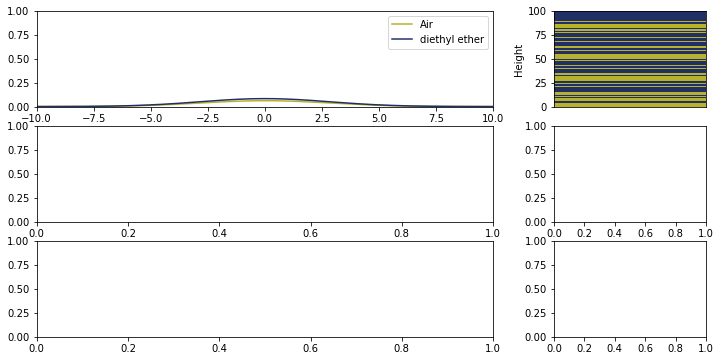

In [4]:
print(env.observation_space)
env.reset()
env.render()

In [15]:
for v in env.vessels:
    print(v)
    Display(v.get_material_table())
    

,Material,Amount,Unit
diethyl ether,diethyl ether,4.0,mol
Na,Na,1.0,mol
Cl,Cl,1.0,mol
dodecane,dodecane,1.0,mol


,Material,Amount,Unit


,Material,Amount,Unit


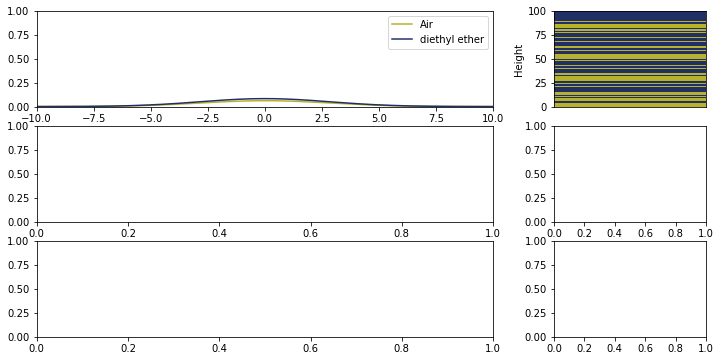

5
7 0.23236295989797914
beaker_1 has no materials.
Desired material not found in beaker_1.
beaker_2 has no materials.
Desired material not found in beaker_2.
beaker_1 has no materials.
Desired material not found in beaker_1.
beaker_2 has no materials.
Desired material not found in beaker_2.
done_reward (extraction_vessel): 33.33 %, in_vessel: 1.000000e+00, initial: 1.000000e+00
6


In [18]:
done = False
env.reset()
x = 0

while not done:
    act = np.random.uniform(0,1,[2])
    act[0]*=7.1
    if act[0]<7:
        act[0]=4
    act[1]*=5
    obs,_,done,_ = env.step(act)
    env.reset()
    x+=1
    if not done:
        clear_output(wait=True)
        env.render()
    print(x)

In [10]:
for v in env.vessels:
    print(v)
    Display(v.get_material_table())

,Material,Amount,Unit
diethyl ether,diethyl ether,4.0,mol
Na,Na,1.0,mol
Cl,Cl,1.0,mol
dodecane,dodecane,1.0,mol


,Material,Amount,Unit


,Material,Amount,Unit


In [8]:
env.extraction.get_action_space()

MultiDiscrete([8 5])

# Potentially fixed water_oil_v1

In [1]:
import numpy as np
import chemistrylab
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')

from chemistrylab.extract_bench import extract_bench_v1

ExtractWorld_Oil_v1 = extract_bench_v1.ExtractWorld_Oil_v1
env = ExtractWorld_Oil_v1()

 PATH
The provided output vessel path is invalid. The default will be provided. KS
Target Material: Na
<class 'chemistrylab.reactions.reaction_base._Reaction'>
['chloro_wurtz.py', 'chloro_wurtz_v1.py', 'decomp.py', 'equilibrium.py', 'fict_react.py', 'fict_react2.py', 'methyl_red.py', 'ode_check.py', 'template.py', 'water_oil_v1.py', '__init__.py']


In [2]:
env.reset()
env.step([0,0])

for x in range(20):
    a=[np.random.randint(9),np.random.randint(4)]
    _ = env.step(a)


obs,rew,done,_ = env.step([9,0])

env.extraction_vessel.get_material_table()

beaker_1 has no materials.
Desired material not found in beaker_1.
beaker_1 has no materials.
Desired material not found in beaker_1.
done_reward (extraction_vessel): 50.0 %, in_vessel: 3.258631e-01, initial: 1.000000e+00
done_reward (beaker_2): 50.0 %, in_vessel: 6.741369e-01, initial: 1.000000e+00


,Material,Amount,Unit
H2O,H2O,30.0,mol
Na,Na,1.0,mol
Cl,Cl,1.0,mol


In [3]:
print(env.observation_space)
print(env.reset().shape)
print(env.step([0,0])[0].shape)


Box(0.0, 1.0, (3, 102), float32)
(3, 102)
(3, 102)


In [4]:
print(rew,done)

0.25 True


# Moving on to Methyl red

In [5]:
import chemistrylab
import numpy as np
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
from IPython import display
Display = display.display


from chemistrylab.extract_algorithms import extractions

from chemistrylab.extract_bench import methyl_red

In [6]:
env = methyl_red.ExtractWorld_MethylRed()


 PATH
The provided output vessel path is invalid. The default will be provided. KS
Target Material: methyl red
<class 'chemistrylab.reactions.reaction_base._Reaction'>
['chloro_wurtz.py', 'chloro_wurtz_v1.py', 'decomp.py', 'equilibrium.py', 'fict_react.py', 'fict_react2.py', 'methyl_red.py', 'ode_check.py', 'template.py', 'water_oil_v1.py', '__init__.py']


In [7]:
env.reset()
env.step([0,0])

for x in range(20):
    a=[np.random.randint(9),np.random.randint(4)]
    try:
        _ = env.step(a)
    except:
        print(a)

obs,rew,done,_ = env.step([9,0])

env.extraction_vessel.get_material_table()
print(rew,done)

Display(env.extraction_vessel.get_material_table())

beaker_1 has no materials.
Desired material not found in beaker_1.
beaker_2 has no materials.
Desired material not found in beaker_2.
beaker_1 has no materials.
Desired material not found in beaker_1.
beaker_2 has no materials.
Desired material not found in beaker_2.
done_reward (extraction_vessel): 64.99 %, in_vessel: 9.280000e-04, initial: 9.280000e-04
0.6498599439775911 True


,Material,Amount,Unit
H2O,H2O,27.700000,mol
H,H,0.000250,mol
Cl,Cl,0.000250,mol
methyl red,methyl red,0.000928,mol


In [8]:
print(env.observation_space)
print(env.reset().shape)
print(env.step([0,0])[0].shape)

Box(0.0, 1.0, (3, 103), float32)
(3, 103)
(3, 103)


Note: action 0 is busted and lets you get zero or a negative amount of stuff in your vessel

# Moving on to Extraction_0

In [1]:
import chemistrylab
import numpy as np
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
from IPython import display
Display = display.display


from chemistrylab.extract_algorithms import extractions

from chemistrylab.extract_bench import extraction_0

In [2]:
ev0=extraction_0.extraction_vessel

extract2 = extractions.extraction_0.Extraction(extraction_vessel=ev0,target_material='methyl red',extractor=extraction_0.EthylAcetate)

v2,ev2,s = extract2.reset(ev0,None)

v2,ev2,r,d = extract2.perform_action(v2,ev2,[0,0])

G=r

for x in range(20):
    a=[np.random.randint(9),np.random.randint(4)]
    #print(a)
    try:
        v2,ev2,r,d = extract2.perform_action(v2,ev2,a)
    except:
        print(a)
        1/0
    G+=r

v2,ev2,r,d = extract2.perform_action(v2,ev2,[9,0])
G+=r

print(G,d)
ev2.get_material_table()

TypeError: object of type 'NoneType' has no len()

In [ ]:
for _v in v2:
    Display(_v.get_material_table(True))
    Display(_v.get_solute_table())
    print("---------------------------------")

In [5]:
env = extraction_0.ExtractWorld_MethylRed()

env.reset()
env.step([0,0])

for x in range(20):
    a=[np.random.randint(9),np.random.randint(4)]
    try:
        _ = env.step(a)
    except:
        print(a)

obs,rew,done,_ = env.step([9,0])

env.extraction_vessel.get_material_table()
print(rew,done)

Display(env.extraction_vessel.get_material_table())

 PATH
The provided output vessel path is invalid. The default will be provided. KS
Target Material: methyl red
<class 'chemistrylab.reactions.reaction_base._Reaction'>
['chloro_wurtz.py', 'chloro_wurtz_v1.py', 'decomp.py', 'equilibrium.py', 'fict_react.py', 'fict_react2.py', 'methyl_red.py', 'ode_check.py', 'template.py', 'water_oil_v1.py', '__init__.py']
HI
[0, 1]
done_reward: -7998860.6565964855, in_beaker_2: -74.22942689321539, initial: 0.000928
extraction_vessel has no materials.
Desired material not found in extraction_vessel.
extraction_vessel has no materials.
Desired material not found in extraction_vessel.
done_reward (beaker_1): 90.03 %, in_vessel: 6.921676e-01, initial: 9.280000e-04
done_reward (beaker_2): 94.8 %, in_vessel: -7.422943e+01, initial: 9.280000e-04
0.4620566335818437 True


,Material,Amount,Unit
H2O,H2O,27.700000,mol
H,H,0.000250,mol
Cl,Cl,0.000250,mol
methyl red,methyl red,0.000928,mol


In [6]:
print(env.observation_space)
print(env.reset().shape)
print(env.step([0,0])[0].shape)

Box(0.0, 1.0, (3, 103), float32)
(3, 103)
(3, 103)


# How to fix in general:


1. create instances of your materials (Ex H -> H())
    - This needs to happen when preparing the initial vessel and in reset
    - Can be done just once in reset
2. Add 'targets' input parameter to reset() and get_observation_space()
    - This step may be more involved to make the obervation space match the observations
    - Requires some modification to observation size and observation array
3. Add in reaction file with the prodects and solvents of the reaction

# Distillation Bench

In [1]:
import chemistrylab,time
import sys
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
import gym
import numpy as np
from gym import envs
import pandas as pd
import numpy as np
from IPython import display
Display = display.display
from matplotlib import pyplot as plt
from IPython.display import clear_output

all_envs = envs.registry.all()
reg = envs.registry
env_ids = [env_spec.id for env_spec in all_envs if 'Distill' in env_spec.id]
print(env_ids)

print(reg.env_specs["WurtzDistill-v1"].entry_point)


['WurtzDistill-v1']
chemistrylab.distillation_bench.distillation_bench_v1:WurtzDistill_v1


In [2]:
from chemistrylab.distillation_bench import distillation_bench_v1

distill = distillation_bench_v1.WurtzDistill_v1()

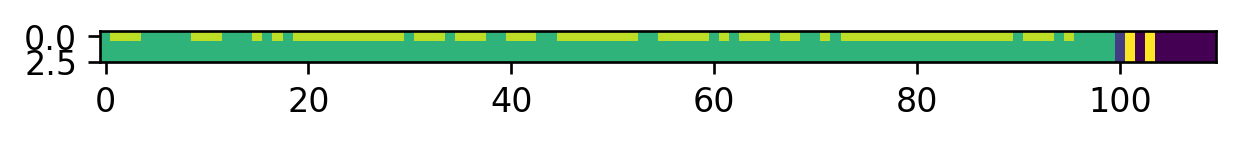

In [3]:
obs0 = distill.reset()
fig = plt.figure(1,figsize=(6,2.5), dpi=240, facecolor='w', edgecolor='k')
plt.imshow(obs0)

In [4]:
print(obs0.shape)
print(distill.step([0,0])[0].shape)
print(distill.observation_space)

(3, 110)
(3, 110)
Box(0.0, 1.0, (3, 103), float32)


In [10]:
def ischemgym(x):
    if "Distill" in x:return True
    if "Extract" in x: return True
    if "React" in x: return True
    return False

env_ids = [env_spec.id for env_spec in all_envs if ischemgym(env_spec.id)]


for id in env_ids:
    
    print("-"*60+"\n"+id,end=":")
    try:
        env=gym.make(id)
        print("Passed")
    except Exception as e:
        print("failed")
        print(e)

------------------------------------------------------------
WurtzExtract-v1:Passed
------------------------------------------------------------
WurtzExtract_Ctd-v1:failed
ERROR: Requested Reaction File Not Found in Directory!
------------------------------------------------------------
Oil_Water_Extract-v1:<chemistrylab.chem_algorithms.vessel.Vessel object at 0x000001634A373B08>
The provided output vessel path is invalid. The default will be provided. KS
Passed
------------------------------------------------------------
MethylRed_Extract-v1:The provided output vessel path is invalid. The default will be provided. KS
Passed
------------------------------------------------------------
MethylRed_Extract-v2:The provided output vessel path is invalid. The default will be provided. KS
Passed
------------------------------------------------------------
WurtzReact-v1:Passed
------------------------------------------------------------
GenWurtzReact-v1:Passed
----------------------------------

In [5]:
import sys
import os
import csv
sys.path.append('../')
sys.path.append('../chemistrylab/reactions')
import gym
import numpy as np
import os
import pickle
from time import sleep
from gym import envs
import matplotlib.pyplot as plt
import pandas as pd


import chemistrylab

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2

from stable_baselines.common.callbacks import BaseCallback
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy


all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs if 'React' in env_spec.id]
print(env_ids)


log_dir = "./tmp_distillationppo/"
try:os.mkdir(log_dir)
except:pass



env = gym.make('WurtzDistill-v1')
print(env.reset().shape)
env = Monitor(env, log_dir, allow_early_resets=True)

action_set = ['Add/Remove Heat', 'Pour BV into B1', 'Pour B1 into B2', 'Wait','Done']

print("The action space is", env.action_space)
print("The observation space is", env.observation_space)
model = PPO2(MlpPolicy, env, verbose=1, seed = 100)

os.makedirs(log_dir, exist_ok=True)
total_episodes_list = []
average_reward_list = [] 



class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).
    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True







callback = SaveOnBestTrainingRewardCallback(check_freq=100, log_dir=log_dir)
time_steps = 25000
model.learn(total_timesteps=time_steps, callback=callback, log_interval=100)
x, y = ts2xy(load_results(log_dir), 'timesteps')
#print("The value of y are", y)
fig = plt.figure("PPO Distillation Bench")
plt.plot(x,y)
plt.xlabel('Number of Timesteps')
plt.ylabel('Rewards')
#print("the value of y are", y)
title = "PPO Distillation Bench"
plt.title(title)

plt.savefig('./PPOdistillationbench.png')
print("Done")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

['WurtzReact-v1', 'GenWurtzReact-v1', 'FictReact-v1', 'FictReact-v2', 'DecompReact-v0', 'WurtzReact-v2', 'ODETestReact-v0']
(3, 110)
The action space is MultiDiscrete([ 5 10])
The observation space is Box(0.0, 1.0, (3, 103), float32)
Wrapping the env in a DummyVecEnv.





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





C:\Users\sprag\anaconda3\envs\gymbaselines\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





ValueError: could not broadcast input array from shape (3,110) into shape (3,103)

In [1]:
import os
os.system("python PPO.py")

ERROR! Session/line number was not unique in database. History logging moved to new session 1953


1

In [2]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
print("TensorFlow version: ", tf.__version__)
print("Is built with CUDA: ", tf.test.is_built_with_cuda())


TensorFlow version:  1.15.0
Is built with CUDA:  True
